#Airline Satisfaction Prediction 



Authors

Sanjana Somashekar (sanjanasomas@iisc.ac.in)

Meghna Reddy (meghnareddy@iisc.ac.in)

Koushik P G (koushikp@iisc.ac.in)


## Contents:

1. Dataset description
2. EDA
3. Missing value imputation
4. Feature scaling and normalisation
5. Feature selection
6. Modelling
7. Conclusion

## Dataset description:

Satisfaction:Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

Age:The actual age of the passengers

Gender:Gender of the passengers (Female, Male)

Type of Travel:Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class:Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Customer Type:The customer type (Loyal customer, disloyal customer)

Flight distance:The flight distance of this journey

Inflight wifi service:Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Ease of Online booking:Satisfaction level of online booking

Inflight service:Satisfaction level of inflight service

Online boarding:Satisfaction level of online boarding

Inflight entertainment:Satisfaction level of inflight entertainment

Food and drink:Satisfaction level of Food and drink

Seat comfort:Satisfaction level of Seat comfort

On-board service:Satisfaction level of On-board service

Leg room service:Satisfaction level of Leg room service

Departure/Arrival time convenient:Satisfaction level of Departure/Arrival time convenient

Baggage handling:Satisfaction level of baggage handling

Gate location:Satisfaction level of Gate location

Cleanliness:Satisfaction level of Cleanliness

Check-in service:Satisfaction level of Check-in service

Departure Delay in Minutes:Minutes delayed when departure

Arrival Delay in Minutes:Minutes delayed when Arrival

Flight cancelled:Whether the Flight cancelled or not (Yes, No)

Flight time in minutes:Minutes of Flight takes

In [ ]:
import pandas as pd
df = pd.read_csv("satisfaction.csv", index_col=0)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 11112 to 84566
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction_v2                    129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1

In [ ]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
df['satisfaction']=df['satisfaction_v2']
df.drop("satisfaction_v2",axis=1, inplace=True)
df.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
11112,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,3,3,0,3,5,3,2,0,0.0,satisfied
110278,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,3,4,4,4,2,3,2,310,305.0,satisfied
103199,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,3,3,4,4,4,2,0,0.0,satisfied
47462,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,1,1,0,1,4,1,3,0,0.0,satisfied
120011,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,2,2,0,2,4,2,5,0,0.0,satisfied


## Imports used

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
from sklearn.impute import KNNImputer
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LinearRegression
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier

# EDA

In [ ]:
def compute_mean(feat):
    count,sum_feat = 0,0
    for i in df[feat].values:
        if i:
            count += 1
            sum_feat += i
    avg = sum_feat/count
    print(feat,avg,count)

Food and drink 2.9888005809496914 123935
Gate location 2.990467977640555 129878
Inflight wifi service 3.252435490335111 129748
Inflight entertainment 3.4628768656128353 126902
Online support 3.5197299024476627 129879
Ease of Online booking 3.4725862839013724 129862
On-board service 3.46520885466795 129875
Leg room service 3.497859946228252 129436
Baggage handling 3.695672928857407 129880
Checkin service 3.3408326211319768 129879
Cleanliness 3.7059018286814243 129875
Online boarding 3.3529484237598757 129866
Departure Delay in Minutes 33.80894841129432 56524


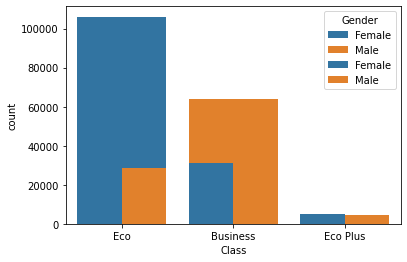

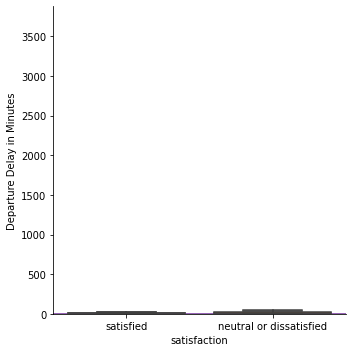

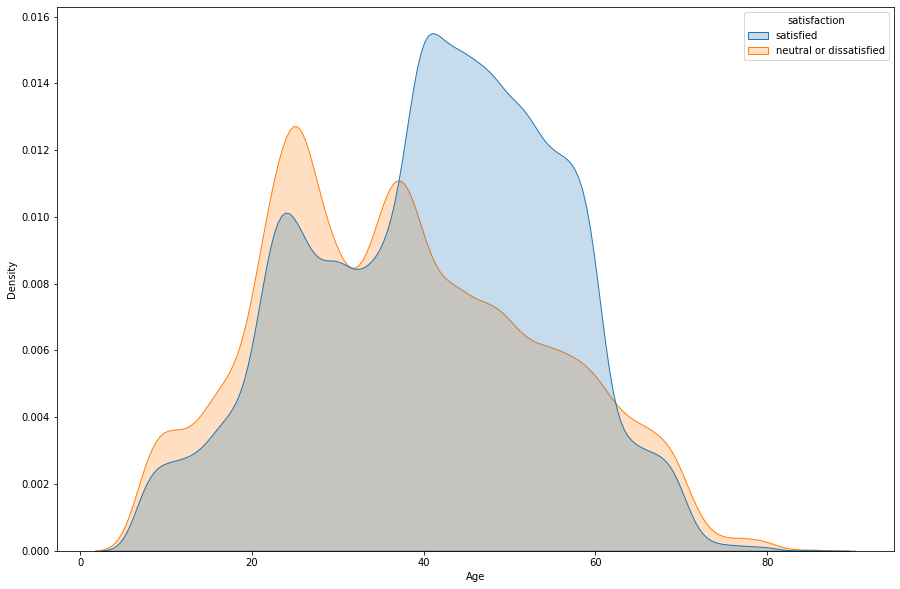

In [ ]:
df[(df['satisfaction'] == 'satisfied')]['Gender'].value_counts()

sns.countplot(data=df, x='Gender', order=df['Gender'].value_counts().index)

df[(df['Customer Type'] == 'Loyal Customer')]['Gender'].value_counts()

ax = sns.countplot(x="satisfaction", hue="Gender", data=df)

sns.countplot(data=df, x='Customer Type', order=df['Customer Type'].value_counts().index)


ax = sns.countplot(x="Class", hue="Gender", data=df)

sns.displot(data=df, x="Age", kde=True)

df['Inflight wifi service'].plot(kind='kde')

df['Inflight entertainment'].plot(kind='kde')

df['Online support'].plot(kind='kde')

df['Ease of Online booking'].plot(kind='kde')

df['Leg room service'].plot(kind='kde')



plt.figure(figsize=(15,10))
sns.kdeplot(x="Age",hue="satisfaction",data=df,shade=True)

for i in df.columns[8:-2]:
    compute_mean(i)


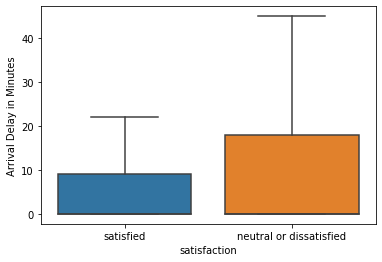

In [ ]:
sns.boxplot(x='satisfaction', y='Arrival Delay in Minutes', data=df,showfliers=False)

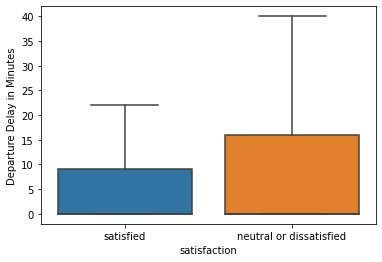

In [ ]:
sns.boxplot(x='satisfaction', y='Departure Delay in Minutes', data=df,showfliers=False)

# Missing Value Imputation

In [ ]:
#define plotting function for missing data only, for given dataframe
def plot_missing_feat(dataframe):
    # General Setup
    each_fig_width = 3.50
    num_of_plt = 4 # per row
    # ceil[13(=features that need missing value imputation/(4 per row)] = 4
    num_of_rows = 4
    plt.rcParams["figure.figsize"] = [num_of_plt*each_fig_width, num_of_rows*each_fig_width]
    plt.rcParams["figure.autolayout"] = True
    sns.set_theme(style="darkgrid")
    index_row = 0
    index_col = 0 #max = num_of_plt

    fig, ax = plt.subplots(num_of_rows,num_of_plt)

    # Other Feature plots 
    ## Rated ones
    number_of_feat = 14  # Not all features here need missing value imputation
    index_order = [0,1,2,3,4,5]
    for cat in dataframe:
        if cat not in collect_features:
            sns.countplot(x = cat, data = dataframe, order = index_order, ax = ax[index_row,index_col])
            index_col = index_col + 1
            if index_col == 4:
                index_col = 0
                index_row = index_row+1 #should not exceed num_of_rows

    fig.delaxes(ax[3,1])
    fig.delaxes(ax[3,2])
    fig.delaxes(ax[3,3])
    plt.show()

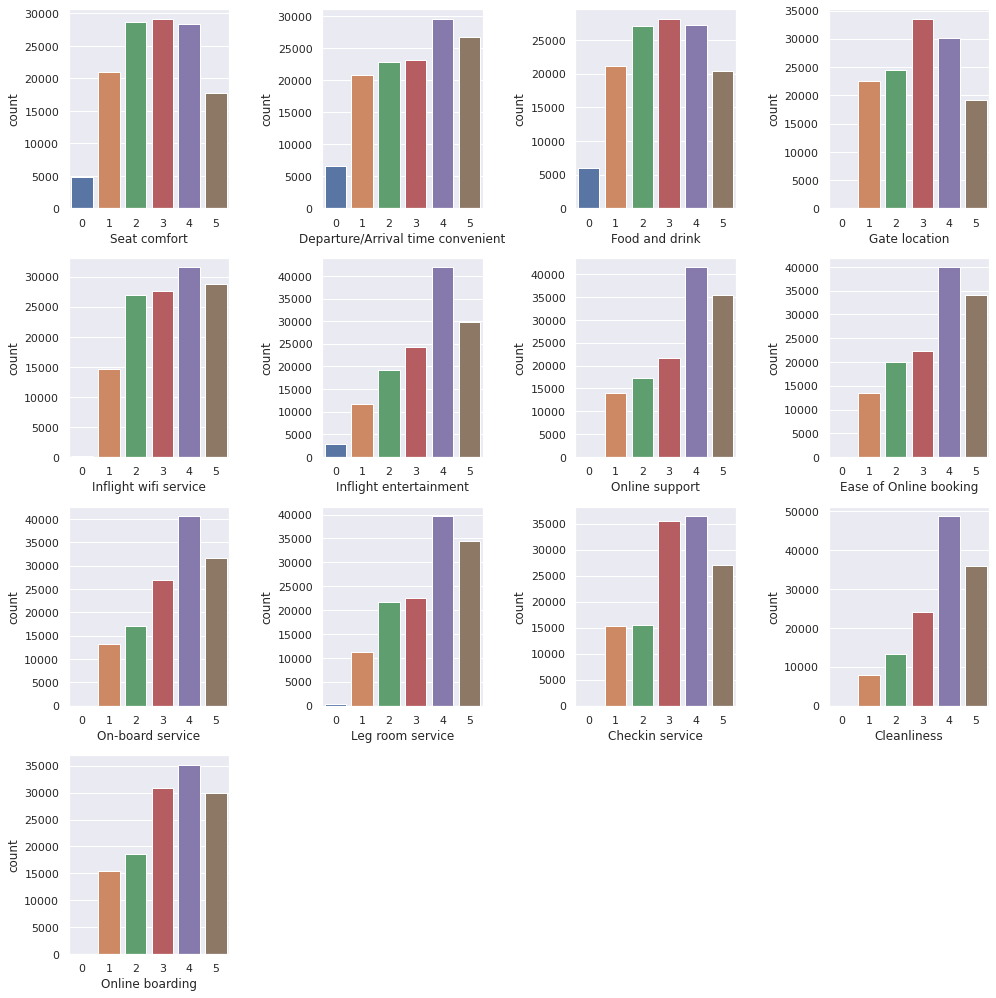

In [ ]:
# Create lists with feature names
avoid_features = ['Age', 'Flight Distance', 'Baggage handling', 'Departure Delay in Minutes'] # No missing data 
labelled_features = ['satisfaction','Gender','Customer Type','Type of Travel', 'Class']
collect_features = avoid_features + labelled_features #features that don't need missing value imputation
missing_features = list(df.columns)
for x in collect_features:
    missing_features.remove(x) 

# Categorically Labelled Data processing
encode = LabelEncoder()
for cat_feature in labelled_features:
    df[cat_feature] = encode.fit_transform(df[cat_feature])
df.head()

# Feature frame, output frame
Y = df['satisfaction']
X = df.drop('satisfaction', axis = 1)
## Any changes to df1 in the future affects label_frame and feature_frame,
## and vice-versa
plot_missing_feat(df)

Mean imputation

In [ ]:
def mean_impute(featureframe):
    ff_mean = featureframe.copy()
    for column in missing_features:
            mean = ff_mean[column][ff_mean[column] != 0 ].mean()
            mean = round(mean)
            ff_mean[column].replace(to_replace = 0 , value = mean, inplace = True)
    plot_missing_feat(ff_mean)
    return ff_mean

Mode imputation

In [ ]:
def mode_impute(featureframe):
    ff_mode = featureframe.copy()
    for column in missing_features:
          mode = ff_mode[column][ff_mode[column] != 0 ].mode()
          if column == 'Arrival Delay in Minutes':
            mode = ff_mode[column].dropna().mode()
          mode = mode.values[0]
          #mode = round(mode)
          if column == 'Arrival Delay in Minutes':
            ff_mode[column].replace(to_replace = np.nan , value = mode, inplace = True)
          else:
            ff_mode[column].replace(to_replace = 0 , value = mode, inplace = True)
    plot_missing_feat(ff_mode)
    return ff_mode

Median imputation 

In [ ]:
def median_impute(featureframe):
    ff_median = featureframe.copy()
    for column in missing_features:
            median = ff_median[column][ff_median[column] != 0 ].median()
            median = round(median)
            ff_median[column].replace(to_replace = 0 , value = median, inplace = True)

    plot_missing_feat(ff_median)
    return ff_median

KNN imputation

In [ ]:
def knn_impute(featureframe):
    ff_knn = featureframe.copy()
    for cat in missing_features:
        if cat == 'Arrival Delay in Minutes':
            continue
        ff_knn[cat] = ff_knn[cat].replace(0,np.nan)
    impute_knn = KNNImputer(missing_values=np.nan, n_neighbors=3) #nan_euclidean multivariate
    ff_knn = pd.DataFrame(impute_knn.fit_transform(ff_knn),columns = ff_knn.columns)
    for cat in missing_features:
        ff_knn[cat] = ff_knn[cat].round()
    plot_missing_feat(ff_knn)
    return (ff_knn,impute_knn)

MICE bayesian imputation

In [ ]:
def mice_bayesian_impute(featureframe):
    ff_mice_bayesian = featureframe.copy()
    for cat in missing_features:
        # Arrival Delay in Minutes contains NaN values
        if cat == 'Arrival Delay in Minutes':
            continue
        ff_mice_bayesian[cat] = ff_mice_bayesian[cat].replace(0,np.nan)
    impute_mice_bayesian = IterativeImputer(missing_values=np.nan, initial_strategy='most_frequent', estimator=BayesianRidge(), n_nearest_features=None, imputation_order='ascending')
    ff_mice_bayesian = pd.DataFrame(impute_mice_bayesian.fit_transform(ff_mice_bayesian), columns = ff_mice_bayesian.columns)
    for cat in missing_features:
        ff_mice_bayesian[cat] = ff_mice_bayesian[cat].round()
    plot_missing_feat(ff_mice_bayesian)
    return (ff_mice_bayesian,impute_mice_bayesian)

MICE logistic imputation

In [ ]:
def mice_linear_impute(featureframe):
    ff_mice_linear = featureframe.copy()
    for cat in missing_features:
        # Arrival Delay in Minutes contains NaN values
        if cat == 'Arrival Delay in Minutes':
            continue
        ff_mice_linear[cat] = ff_mice_linear[cat].replace(0,np.nan)
    impute_mice_linear = IterativeImputer(missing_values=np.nan, initial_strategy='most_frequent', estimator=LinearRegression(), n_nearest_features=None, imputation_order='random')
    ff_mice_linear = pd.DataFrame(impute_mice_linear.fit_transform(ff_mice_linear), columns = ff_mice_linear.columns)
    for cat in missing_features:
        ff_mice_linear[cat] = ff_mice_linear[cat].round()
    plot_missing_feat(ff_mice_linear)
    return (ff_mice_linear,impute_mice_linear)

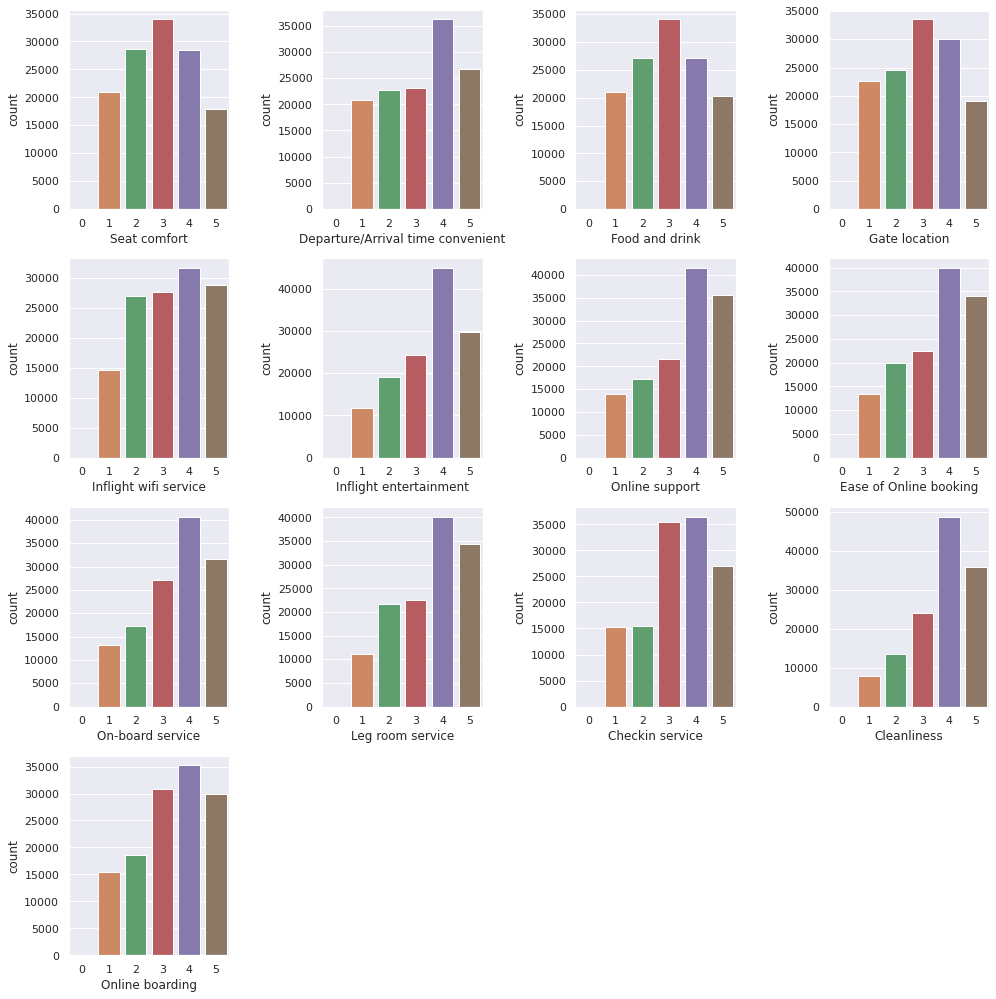

In [ ]:
df1 = mode_impute(X)


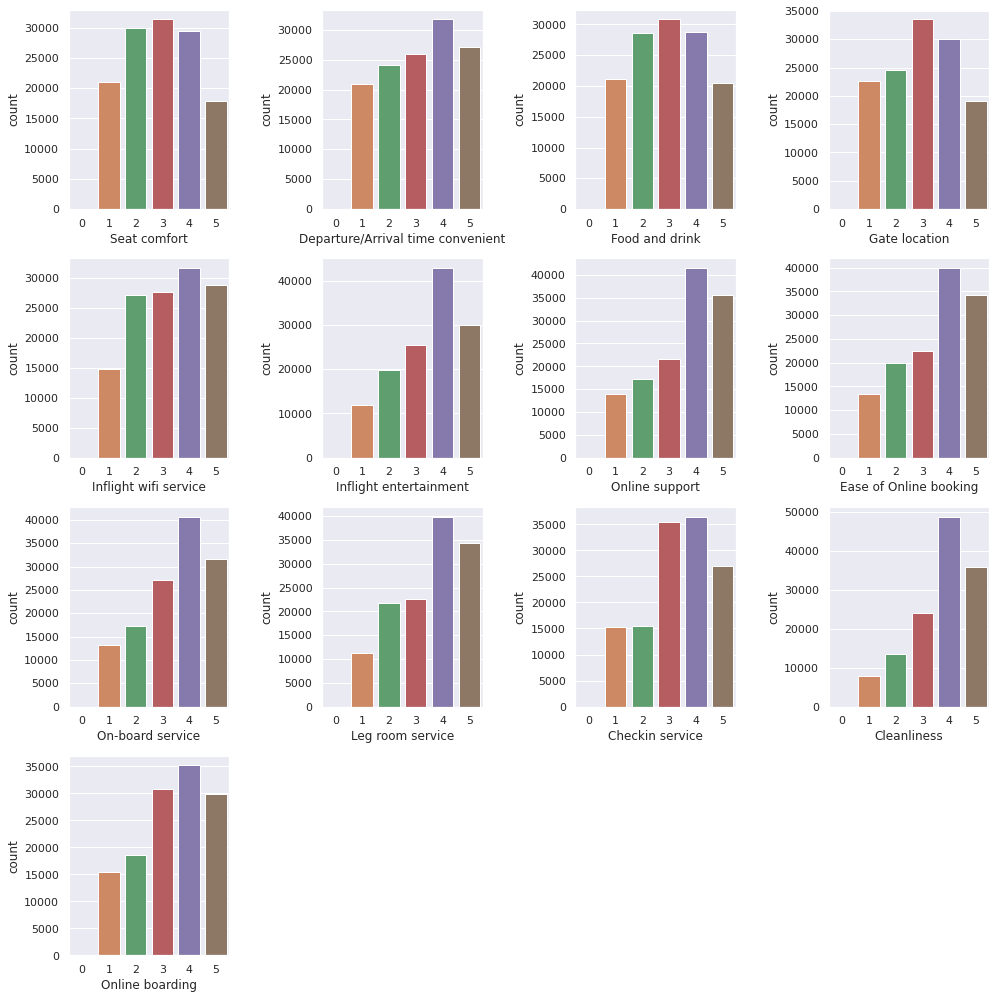

In [ ]:
df2, df2_imp = knn_impute(X)

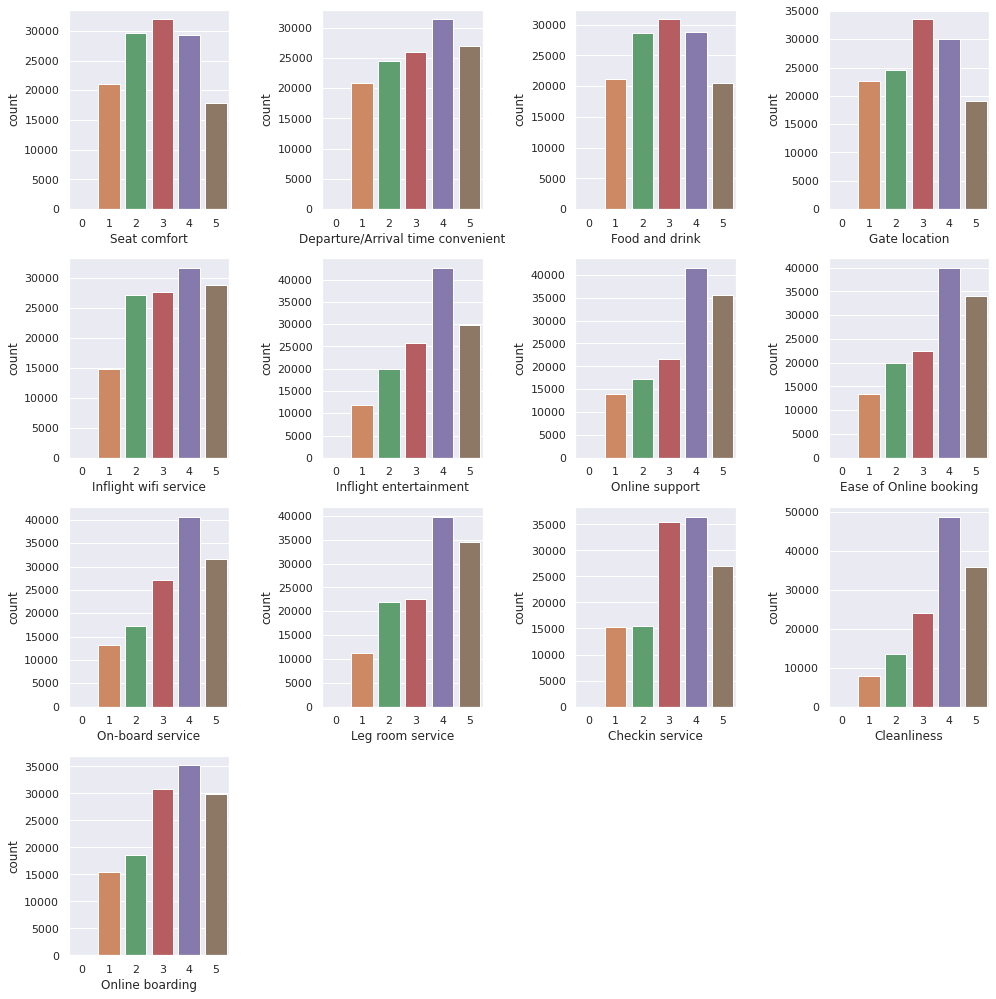

In [ ]:
df3, df3_imp = mice_bayesian_impute(X)

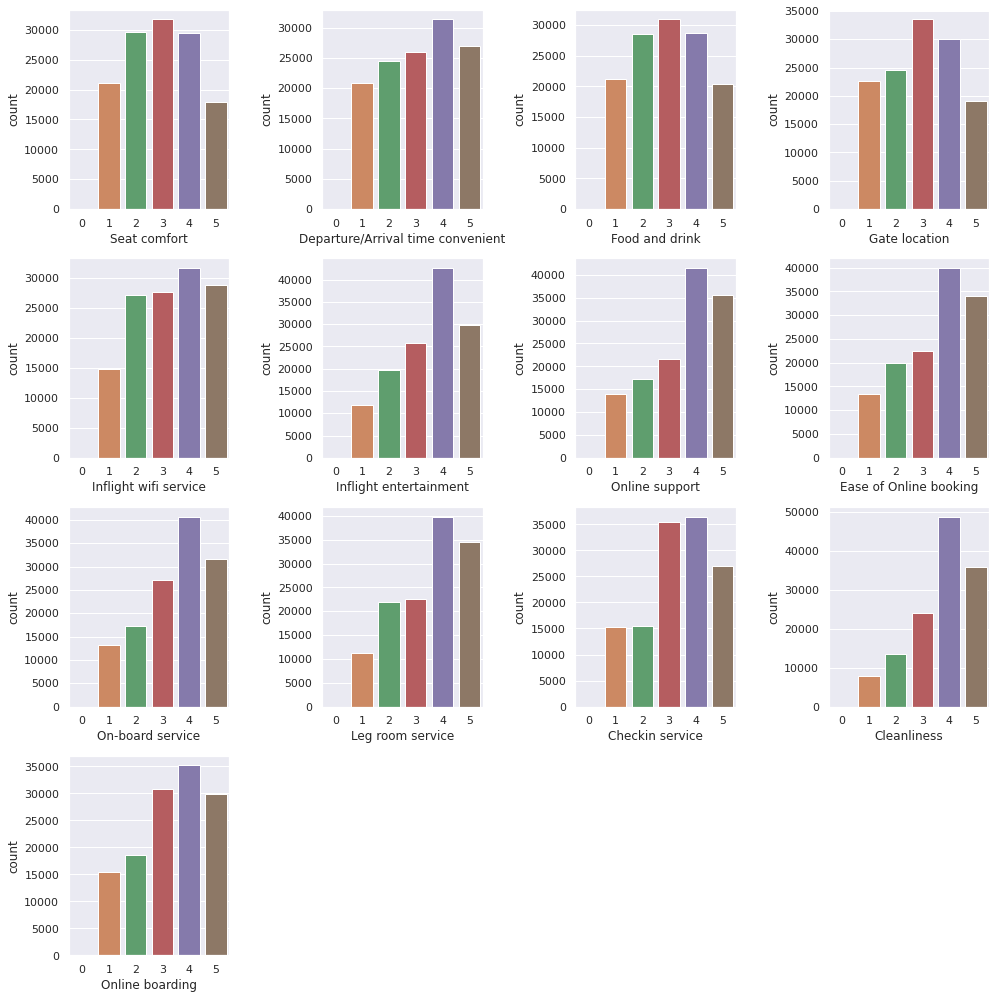

In [ ]:
df4, df4_imp = mice_linear_impute(X)

# Feature scaling and Normalisation

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.model_selection import GridSearchCV

In [ ]:
df_missing = {}
df_missing['mode'] = df1
df_missing['knn'] = df2
df_missing['bayes'] = df3
df_missing['linear'] = df4

In [ ]:
  df_standard1 = pd.DataFrame()
  cols_to_scale = df1.columns[5:]

  #create and fit scaler
  scaler = StandardScaler()
  scaler.fit(df1[cols_to_scale])

  #scale selected data
  df_standard1[cols_to_scale] = scaler.transform(df1[cols_to_scale])
  print(df_standard1.shape)
  print(df1[df1.columns[0:5]].shape)
  dat1 = df_standard1.reset_index(drop=True)
  dat2 = df1[df1.columns[0:5]].reset_index(drop=True)
  pd.concat([dat1,dat2],axis=1)

(129880, 17)
(129880, 5)


,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,...,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Customer Type,Age,Type of Travel,Class
0,-1.671103,0.039616,0.585897,0.008210,-0.758449,-0.953036,0.421579,-1.163237,-0.362211,-0.366134,...,1.316226,-0.613016,-1.042178,-0.386481,-0.391644,0,0,65,1,1
1,0.469852,0.039616,0.585897,0.008210,0.007299,0.567934,-1.185027,-1.163237,-0.362211,0.420863,...,-1.063697,-0.613016,-1.042178,7.756204,7.547714,1,0,47,1,0
2,0.152458,0.039616,0.585897,0.008210,0.007299,-0.953036,0.421579,-1.163237,-1.128536,-0.366134,...,0.522919,0.255385,-1.042178,-0.386481,-0.391644,0,0,15,1,1
3,-1.322552,0.039616,0.585897,0.008210,0.007299,-0.192551,0.421579,-0.397815,-1.894861,-1.940128,...,0.522919,-2.349818,-0.271916,-0.386481,-0.391644,0,0,60,1,1
4,-1.584452,0.039616,0.585897,0.008210,0.007299,0.567934,-0.381724,0.367606,-1.128536,-1.153131,...,0.522919,-1.481417,1.268607,-0.386481,-0.391644,0,0,70,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,-0.243799,1.605430,1.314516,1.544776,0.007299,-0.953036,1.224882,-1.163237,-1.128536,-0.366134,...,0.522919,0.255385,-1.042178,-0.386481,-0.391644,0,1,29,1,1
129876,0.102804,-0.743292,-0.142723,-0.760072,0.773047,-0.953036,-1.988330,-1.928658,-0.362211,-1.153131,...,-1.857005,-1.481417,-1.812439,4.183929,4.085634,1,1,63,1,0
129877,0.329653,0.039616,0.585897,0.008210,0.007299,-0.192551,-1.185027,-1.163237,0.404114,0.420863,...,-1.063697,-0.613016,-1.042178,3.684862,3.851357,1,1,69,1,1
129878,0.456222,0.039616,-0.871342,0.008210,-0.758449,-0.192551,-1.185027,-1.163237,-0.362211,-0.366134,...,-1.063697,-2.349818,-1.042178,4.682997,4.944646,1,1,66,1,1


In [ ]:
df1

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
id,,,,,,,,,,,,,,,,,,,,,
11112,0,0,65,1,1,265,3,4,3,2,...,2,3,3,4,3,5,3,2,0,0.0
110278,1,0,47,1,0,2464,3,4,3,3,...,2,3,4,4,4,2,3,2,310,305.0
103199,0,0,15,1,1,2138,3,4,3,3,...,2,2,3,3,4,4,4,2,0,0.0
47462,0,0,60,1,1,623,3,4,3,3,...,3,1,1,4,1,4,1,3,0,0.0
120011,0,0,70,1,1,354,3,4,3,3,...,4,2,2,4,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119211,0,1,29,1,1,1731,5,5,5,3,...,2,2,3,3,4,4,4,2,0,0.0
97768,1,1,63,1,0,2087,2,3,2,4,...,1,3,2,3,3,1,2,1,174,172.0
125368,1,1,69,1,1,2320,3,4,3,3,...,2,4,4,3,4,2,3,2,155,163.0


In [ ]:
dict_list = []
for key, value in df_missing.items():

  df_dict= {}
  df_standard1 = pd.DataFrame()
  cols_to_scale = value.columns[5:]

  #create and fit scaler
  scaler = StandardScaler()
  scaler.fit(value[cols_to_scale])

  #scale selected data
  df_standard1[cols_to_scale] = scaler.transform(value[cols_to_scale])
  dat1 = df_standard1.reset_index(drop=True)
  dat2 = value[value.columns[0:5]].reset_index(drop=True)
  
  df_dict['df_standard1'] = pd.concat([dat1,dat2],axis=1)

  df_standard2 = pd.DataFrame()
  cols_to_scale = value.columns[5:]

  #create and fit scaler
  scaler = Normalizer()
  scaler.fit(value[cols_to_scale])

  #scale selected data
  df_standard2[cols_to_scale] = scaler.transform(value[cols_to_scale])
  dat1 = df_standard2.reset_index(drop=True)

  df_dict['df_normalizer'] = pd.concat([dat1,dat2],axis=1)

  df_standard3 = pd.DataFrame()
  cols_to_scale = value.columns[5:]

  #create and fit scaler
  scaler = MinMaxScaler()
  scaler.fit(value[cols_to_scale])


  #scale selected data
  df_standard3[cols_to_scale] = scaler.transform(value[cols_to_scale])
  dat1 = df_standard3.reset_index(drop=True)

  df_dict['df_min_max'] = pd.concat([dat1,dat2],axis=1)

  df_standard4 = pd.DataFrame()
  cols_to_scale = value.columns[5:]

  #create and fit scaler
  scaler = PowerTransformer()
  scaler.fit(value[cols_to_scale])

  #scale selected data
  df_standard4[cols_to_scale] = scaler.transform(value[cols_to_scale])
  dat1 = df_standard4.reset_index(drop=True)

  df_dict['df_PowerTransformer'] = pd.concat([dat1,dat2],axis=1)

  dict_list.append(df_dict)


# Feature selection


# Filter methods

##Information Gain

Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

In [ ]:
def info_gain(X, Y):
  series=pd.Series(mutual_info_classif(X,Y),index=X.columns).sort_values()
  series.plot(kind="barh")
  feature_selection=series[series>0.03].index
  selected_df = X[feature_selection]
  return selected_df

## Removing features with low variance

The variance threshold is a simple baseline approach to feature selection. It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples. We want to remove all features that are either one or zero (on or off) in more than 80% of the samples. 

In [ ]:
def low_variance(X):
  sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
  sel.fit_transform(X)
  feature_selection=sel.get_feature_names_out()
  selected_df = X[feature_selection]
  return selected_df

## Correlation Coefficient

Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only really needs one of them, as the second one does not add additional information. We will use the Pearson Correlation here.

In [ ]:
def corr_coeff_selection(df):
  cor = df.corr()
  plt.figure(figsize = (25,18))
  sns.heatmap(cor, annot=True)
  columns = np.full((cor.shape[0],), True, dtype=bool)
  for i in range(cor.shape[0]):
    for j in range(i+1, cor.shape[0]):
        if cor.iloc[i,j] >= 0.7:
            if columns[j]:
                columns[j] = False
  selected_columns = df.columns[columns]
  X1 = df[selected_columns]
  return X1

In [ ]:
def plot_correlation(X):
  result = pd.DataFrame()
  result['satisfaction'] = X['satisfaction']
  fig = plt.figure(figsize = (20, 25))
  j = 0
  for i in X.columns:
      plt.subplot(6, 4, j+1)
      j += 1
      sns.distplot(X[i][result['satisfaction']==0], color='g', label = 'nuetral or not satisfied')
      sns.distplot(X[i][result['satisfaction']==1], color='r', label = 'satisfied')
      plt.legend(loc='best')
  fig.tight_layout()
  fig.subplots_adjust(top=0.95)
  plt.show()


## Chi-square Test
The Chi-square test is used for categorical features in a dataset. We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores. In order to correctly apply the chi-squared in order to test the relation between various features in the dataset and the target variable, the following conditions have to be met: the variables have to be categorical, sampled independently and values should have an expected frequency greater than 5.

In [ ]:
def chi_sq(X, y):
  X_new = SelectKBest(chi2, k=10).fit(X, y)
  feature_selection=X_new.get_feature_names_out()
  selected_df = X[feature_selection]
  return selected_df

# Wrapper methods

## Step Forward Selection

Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

Using linear regression:

In [ ]:
def sfs_lr(x, y):
  LR = LinearRegression()
  sfs2 = sfs(LR, k_features = 10,forward=True, floating=False, scoring='r2',verbose=2,cv=5)
  sfs2.fit(x,y)
  feature_cols = list(sfs2.k_feature_idx_)
  features_selected=[x.columns[i] for i in feature_cols]
  X1 = x[features_selected]
  print(type(x))
  print(type(X1))
  return X1

Using KNN:

In [ ]:
def sfs_knn(x, y):
  knn = KNeighborsClassifier(n_neighbors=4)
  sfs1 = sfs(knn, 
            k_features=10, 
            forward=True, 
            floating=False, 
            verbose=2,
            scoring='accuracy',
            cv=0)

  sfs1 = sfs1.fit(x, y)
  feature_cols = list(sfs1.k_feature_idx_)
  X1=x[feature_cols]
  return X1


## Embedded Methods:

## LASSO Regularization (L1)

Regularization consists of adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model, i.e. to avoid over-fitting. In linear model regularization, the penalty is applied over the coefficients that multiply each of the predictors. From the different types of regularization, Lasso or L1 has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.


In [ ]:
def lasso(x,y):
  reg = LassoCV()
  reg.fit(x,y)

  coef = pd.Series(reg.coef_, index=x.columns)
  imp_coef = coef.sort_values()
  plt.rcParams['figure.figsize']=(8,10)
  imp_coef.plot(kind = 'barh')

  return coef



RandomForestClassifier

In [ ]:
def rfc(x,y):
  model = RandomForestClassifier(n_estimators = 300)
  model.fit(x,y)
  importances = model.feature_importances_

  print(pd.DataFrame(x).columns)
  final_df = pd.DataFrame({"Features":pd.DataFrame(x).columns, "Importances":importances})
  final_df.set_index('Features')
  final_df.plot.bar()
  return final_df

(129880, 13)
Index(['Inflight wifi service', 'Customer Type', 'Checkin service',
       'Cleanliness', 'Class', 'Baggage handling', 'Leg room service',
       'Online boarding', 'On-board service', 'Online support',
       'Ease of Online booking', 'Seat comfort', 'Inflight entertainment'],
      dtype='object')


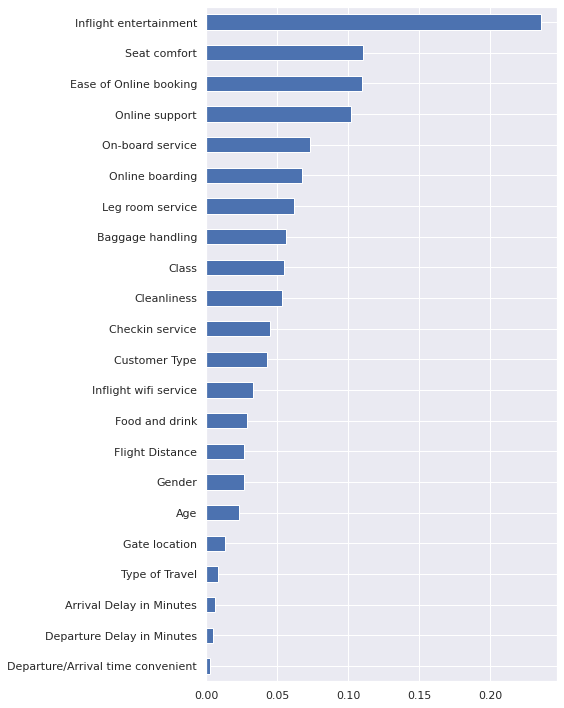

In [ ]:
Y=df["satisfaction"]
X=df1

df_new = info_gain(X,Y)
print(df_new.shape)
print(df_new.columns)

In [ ]:
df_new1 = low_variance(df1)
print(df_new1.shape)
print(df_new1.columns)

(129880, 21)
Index(['Gender', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink',
       'Gate location', 'Inflight wifi service', 'Inflight entertainment',
       'Online support', 'Ease of Online booking', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Cleanliness', 'Online boarding', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')


(129880, 21)
Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes'],
      dtype='object')


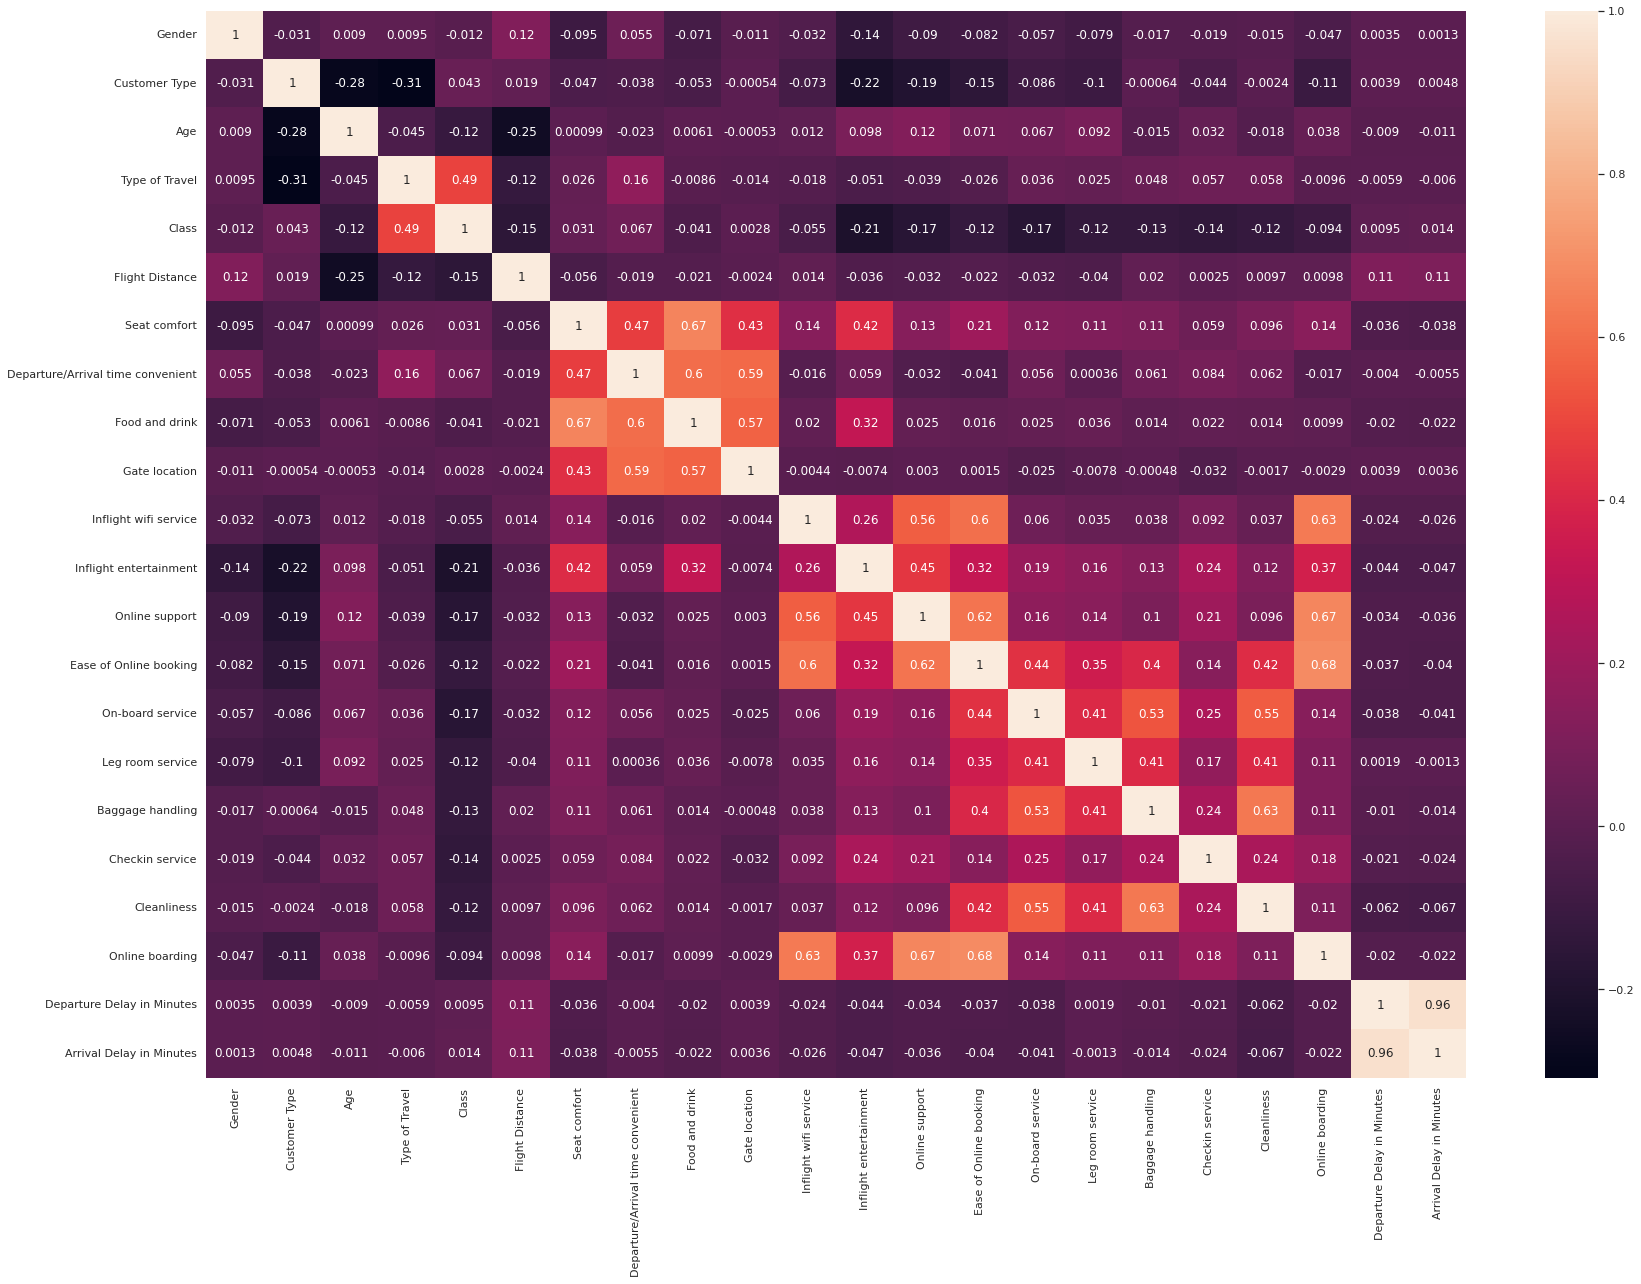

In [ ]:
df_new2 = corr_coeff_selection(df1)
print(df_new2.shape)
print(df_new2.columns)

In [ ]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [ ]:
cat_features = ['Gender','Customer Type','Type of Travel','Class','Seat comfort','Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding']
updated_df = df1[cat_features]

df_new3 = chi_sq(updated_df, Y)
print(df_new3.shape)
print(df_new3.columns)

(129880, 10)
Index(['Customer Type', 'Class', 'Seat comfort', 'Inflight entertainment',
       'Online support', 'Ease of Online booking', 'On-board service',
       'Leg room service', 'Checkin service', 'Online boarding'],
      dtype='object')


In [ ]:
df_new4 = sfs_lr(df1, Y)
print(df_new4.shape)
print(df_new4.columns)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    1.1s finished

[2022-04-15 19:35:47] Features: 1/10 -- score: -0.6577524370575354[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    2.6s finished

[2022-04-15 19:35:49] Features: 2/10 -- score: -0.29720866860102024[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.7s finished

[2022-04-15 19:35:53] Features: 3/10 -- score: -0.1725813965996671[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Do

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(129880, 10)
Index(['Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight entertainment', 'Ease of Online booking', 'On-board service',
       'Leg room service', 'Checkin service', 'Arrival Delay in Minutes'],
      dtype='object')


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    8.9s finished

[2022-04-15 19:36:43] Features: 10/10 -- score: 0.04516781230327305

In [ ]:
df_new6 = sfs_knn(df1, Y)
print(df_new6.shape)
print(df_new6.columns)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed: 14.9min finished

[2022-04-15 19:53:35] Features: 1/10 -- score: 0.5755543578688019[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.9s remaining:    0.0s


Gender                              -0.039870
Customer Type                       -0.066177
Age                                  0.000797
Type of Travel                      -0.000000
Class                               -0.062222
Flight Distance                     -0.000003
Seat comfort                         0.052909
Departure/Arrival time convenient   -0.027055
Food and drink                       0.000000
Gate location                       -0.000000
Inflight wifi service               -0.000000
Inflight entertainment               0.142947
Online support                       0.009412
Ease of Online booking               0.049568
On-board service                     0.041118
Leg room service                     0.032362
Baggage handling                     0.000000
Checkin service                      0.026375
Cleanliness                          0.000000
Online boarding                      0.000000
Departure Delay in Minutes           0.000000
Arrival Delay in Minutes          

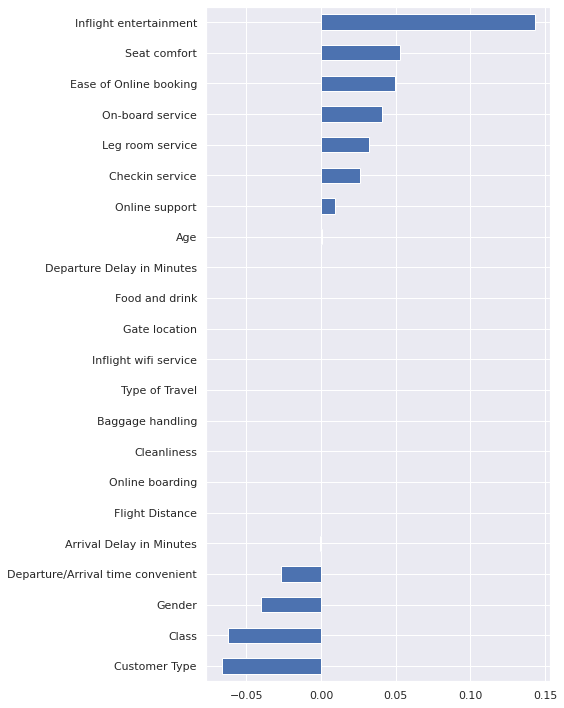

In [ ]:
features = lasso(df1, Y)
features

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')


,Features,Importances
0,Gender,0.030120
1,Customer Type,0.042142
2,Age,0.035057
3,Type of Travel,0.028796
4,Class,0.032499
5,Flight Distance,0.038837
6,Seat comfort,0.102611
7,Departure/Arrival time convenient,0.024233
8,Food and drink,0.028467
9,Gate location,0.021462


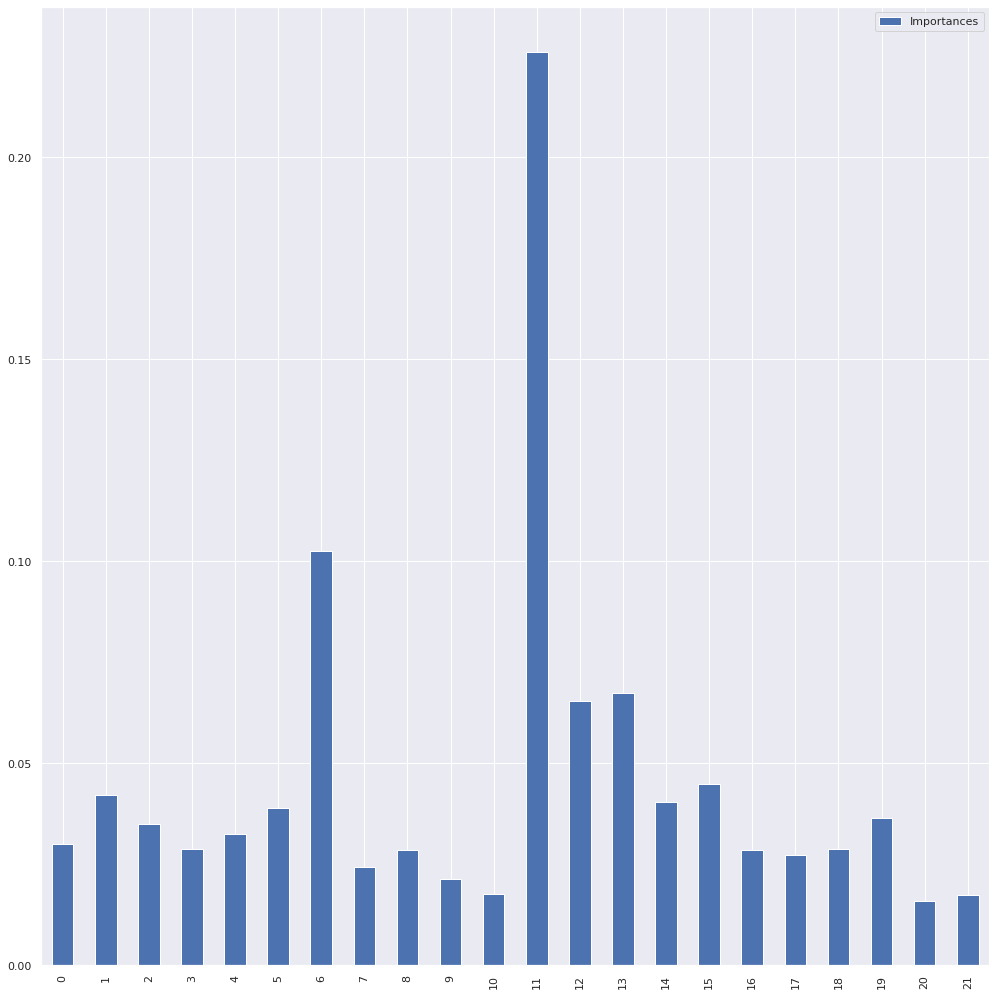

In [ ]:
df_new5 = rfc(df1, Y)
df_new5

In [ ]:
df_new5.sort_values(by='Importances')

,Features,Importances
20,Departure Delay in Minutes,0.015826
21,Arrival Delay in Minutes,0.017297
10,Inflight wifi service,0.017740
9,Gate location,0.021462
7,Departure/Arrival time convenient,0.024233
17,Checkin service,0.027352
8,Food and drink,0.028467
16,Baggage handling,0.028491
18,Cleanliness,0.028697
3,Type of Travel,0.028796


Features selected from above results:
1. Inflight entertainment
2. Ease of Online booking
3. Online support
4. Leg room service
5. On-board service
6. Class
7. Customer Type  
8. Arrival Delay in Minutes


## ML Modelling

In [ ]:
from sklearn import tree
dtc_model = tree.DecisionTreeClassifier(random_state=0)

for d in dict_list:
  for key,df_fin in d.items():
    print("Running "+key+"scaling")
    print(df_fin.columns)
    df_fin = df_fin
    X_train, X_test,y_train,y_test = train_test_split(df_fin, Y, test_size=0.2)
    dtc_model.fit(X_train, y_train)

    dtc_prediction = dtc_model.predict(X_test)
    print(accuracy_score(dtc_prediction, y_test))
    print(classification_report(dtc_prediction, y_test))

Running df_standard1scaling
Index(['Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Gender',
       'Customer Type', 'Age', 'Type of Travel', 'Class'],
      dtype='object')
0.9317831844779797
              precision    recall  f1-score   support

           0       0.92      0.93      0.92     11671
           1       0.94      0.94      0.94     14305

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976

Running df_normalizerscaling
Index(['Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food

In [ ]:
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


KNN_model = KNeighborsClassifier(n_neighbors=5)


for d in dict_list:
  for key,df_fin in d.items():
    print("Running "+key+"scaling")
    print(df_fin.columns)
    df_fin = df_fin
    X_train, X_test,y_train,y_test = train_test_split(df_fin, Y, test_size=0.2)

    KNN_model.fit(X_train, y_train)

    KNN_prediction = KNN_model.predict(X_test)
    print(accuracy_score(KNN_prediction, y_test))
    print(classification_report(KNN_prediction, y_test))



Running df_standard1scaling
Index(['Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Gender',
       'Customer Type', 'Age', 'Type of Travel', 'Class'],
      dtype='object')
0.8972128118263012
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     12291
           1       0.89      0.92      0.90     13685

    accuracy                           0.90     25976
   macro avg       0.90      0.90      0.90     25976
weighted avg       0.90      0.90      0.90     25976

Running df_normalizerscaling
Index(['Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

for d in dict_list:
  for key,df_fin in d.items():
    print("Running "+key+"scaling")
    print(df_fin.columns)
    df_fin = df_fin
    X_train, X_test,y_train,y_test = train_test_split(df_fin, Y, test_size=0.2)
    rfc_model.fit(X_train, y_train)

    rfc_prediction = rfc_model.predict(X_test)
    print(accuracy_score(rfc_prediction, y_test))
    print(classification_report(rfc_prediction, y_test))


Running df_standard1scaling
Index(['Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Gender',
       'Customer Type', 'Age', 'Type of Travel', 'Class'],
      dtype='object')
0.8575993224514937
              precision    recall  f1-score   support

           0       0.80      0.87      0.84     10811
           1       0.90      0.85      0.87     15165

    accuracy                           0.86     25976
   macro avg       0.85      0.86      0.86     25976
weighted avg       0.86      0.86      0.86     25976

Running df_normalizerscaling
Index(['Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food

In [ ]:
lgr_model = LogisticRegression(max_iter=300)

for d in dict_list:
  for key,df_fin in d.items():
    print("Running "+key+"scaling")
    print(df_fin.columns)
    df_fin = df_fin
    X_train, X_test,y_train,y_test = train_test_split(df_fin, Y, test_size=0.2)
    lgr_model.fit(X_train, y_train)

    lgr_prediction = lgr_model.predict(X_test)
    print(accuracy_score(lgr_prediction, y_test))
    print(classification_report(lgr_prediction, y_test))

Running df_standard1scaling
Index(['Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Gender',
       'Customer Type', 'Age', 'Type of Travel', 'Class'],
      dtype='object')
0.8539036033261472
              precision    recall  f1-score   support

           0       0.83      0.85      0.84     11589
           1       0.87      0.86      0.87     14387

    accuracy                           0.85     25976
   macro avg       0.85      0.85      0.85     25976
weighted avg       0.85      0.85      0.85     25976

Running df_normalizerscaling
Index(['Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7546966430551278
              precision    recall  f1-score   support

           0       0.69      0.75      0.72     10768
           1       0.81      0.76      0.78     15208

    accuracy                           0.75     25976
   macro avg       0.75      0.75      0.75     25976
weighted avg       0.76      0.75      0.76     25976

Running df_min_maxscaling
Index(['Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Gender',
       'Customer Type', 'Age', 'Type of Travel', 'Class'],
      dtype='object')
0.8514012935016939
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8483985217123499
              precision    recall  f1-score   support

           0       0.82      0.84      0.83     11550
           1       0.87      0.85      0.86     14426

    accuracy                           0.85     25976
   macro avg       0.85      0.85      0.85     25976
weighted avg       0.85      0.85      0.85     25976

Running df_PowerTransformerscaling
Index(['Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Gender',
       'Customer Type', 'Age', 'Type of Travel', 'Class'],
      dtype='object')
0.852594702802587
              precision    recall  f1-score   support

           0       0.83      0.84      0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8523252232830305
              precision    recall  f1-score   support

           0       0.83      0.84      0.84     11504
           1       0.87      0.86      0.87     14472

    accuracy                           0.85     25976
   macro avg       0.85      0.85      0.85     25976
weighted avg       0.85      0.85      0.85     25976

Running df_PowerTransformerscaling
Index(['Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Gender',
       'Customer Type', 'Age', 'Type of Travel', 'Class'],
      dtype='object')
0.8535186325839236
              precision    recall  f1-score   support

           0       0.83      0.84      

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8495149368647983
              precision    recall  f1-score   support

           0       0.82      0.85      0.83     11381
           1       0.88      0.85      0.86     14595

    accuracy                           0.85     25976
   macro avg       0.85      0.85      0.85     25976
weighted avg       0.85      0.85      0.85     25976

Running df_PowerTransformerscaling
Index(['Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service',
       'Inflight entertainment', 'Online support', 'Ease of Online booking',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Gender',
       'Customer Type', 'Age', 'Type of Travel', 'Class'],
      dtype='object')
0.8548275331074838
              precision    recall  f1-score   support

           0       0.83      0.84      

#ANN

#Mode imputation technique with standard scaling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop,Adam

df_fin = dict_list[0]['df_standard1']
X_train, X_test,y_train,y_test = train_test_split(df_fin, Y, test_size=0.2)

model = Sequential()
model.add(Dense(32, kernel_initializer = 'uniform', activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)


In [ ]:
history = model.fit(X_train, y_train, batch_size = 32, epochs = 100, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/100
2598/2598 [==============================] - 11s 4ms/step - loss: 0.5119 - accuracy: 0.7719 - val_loss: 0.3666 - val_accuracy: 0.8463
Epoch 2/100
2598/2598 [==============================] - 12s 5ms/step - loss: 0.4086 - accuracy: 0.8393 - val_loss: 0.3398 - val_accuracy: 0.8566
Epoch 3/100
2598/2598 [==============================] - 13s 5ms/step - loss: 0.3820 - accuracy: 0.8503 - val_loss: 0.3156 - val_accuracy: 0.8623
Epoch 4/100
2598/2598 [==============================] - 11s 4ms/step - loss: 0.3596 - accuracy: 0.8577 - val_loss: 0.2967 - val_accuracy: 0.8694
Epoch 5/100
2598/2598 [==============================] - 17s 6ms/step - loss: 0.3416 - accuracy: 0.8640 - val_loss: 0.2781 - val_accuracy: 0.8768
Epoch 6/100
2598/2598 [==============================] - 14s 5ms/step - loss: 0.3261 - accuracy: 0.8700 - val_loss: 0.2658 - val_accuracy: 0.8841
Epoch 7/100
2598/2598 [==============================] - 13s 5ms/step - loss: 0.3164 - accuracy: 0.8731 - val_loss: 0.2572 -

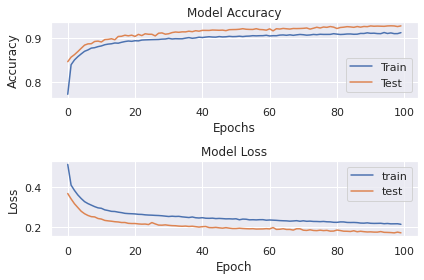

In [ ]:
#Plotting Neural Network Training and validation
%matplotlib inline
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()



Accuracy Score:  92.62%
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     11744
           1       0.94      0.93      0.93     14232

    accuracy                           0.93     25976
   macro avg       0.93      0.93      0.93     25976
weighted avg       0.93      0.93      0.93     25976



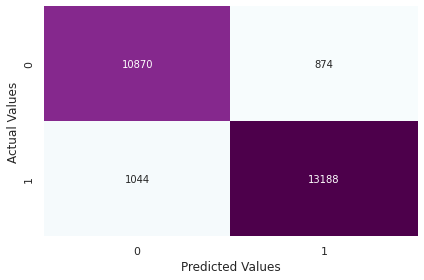

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred=(model.predict(X_test) > 0.5).astype(int)   
print('Accuracy Score: ', '{:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#KNN imputation with normalizer

In [ ]:
df_fin = dict_list[1]['df_normalizer']
X_train, X_test,y_train,y_test = train_test_split(df_fin, Y, test_size=0.2)

history1 = model.fit(X_train, y_train, batch_size = 32, epochs = 100, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/100
2598/2598 [==============================] - 7s 3ms/step - loss: 0.5406 - accuracy: 0.7549 - val_loss: 0.4970 - val_accuracy: 0.7729
Epoch 2/100
2598/2598 [==============================] - 7s 3ms/step - loss: 0.5400 - accuracy: 0.7547 - val_loss: 0.4937 - val_accuracy: 0.7801
Epoch 3/100
2598/2598 [==============================] - 7s 3ms/step - loss: 0.5356 - accuracy: 0.7569 - val_loss: 0.4915 - val_accuracy: 0.7768
Epoch 4/100
2598/2598 [==============================] - 7s 3ms/step - loss: 0.5344 - accuracy: 0.7595 - val_loss: 0.4898 - val_accuracy: 0.7798
Epoch 5/100
2598/2598 [==============================] - 6s 2ms/step - loss: 0.5309 - accuracy: 0.7603 - val_loss: 0.4878 - val_accuracy: 0.7813
Epoch 6/100
2598/2598 [==============================] - 6s 2ms/step - loss: 0.5300 - accuracy: 0.7621 - val_loss: 0.4849 - val_accuracy: 0.7814
Epoch 7/100
2598/2598 [==============================] - 7s 3ms/step - loss: 0.5278 - accuracy: 0.7648 - val_loss: 0.4883 - val_ac

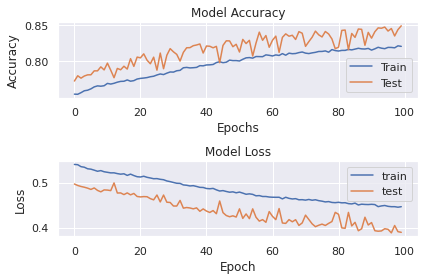

In [ ]:
#Plotting Neural Network Training and validation
%matplotlib inline
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()


Accuracy Score:  84.37%
              precision    recall  f1-score   support

           0       0.85      0.80      0.82     11753
           1       0.84      0.88      0.86     14223

    accuracy                           0.84     25976
   macro avg       0.84      0.84      0.84     25976
weighted avg       0.84      0.84      0.84     25976



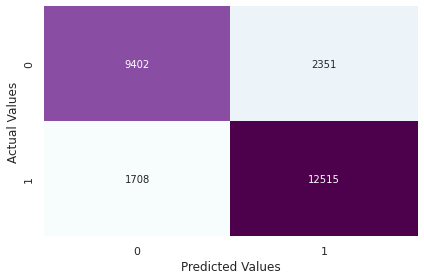

In [ ]:
y_pred=(model.predict(X_test) > 0.5).astype(int)   
print('Accuracy Score: ', '{:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#MICE Bayesian imputation with MINMAX

In [ ]:
df_fin = dict_list[2]['df_min_max']
X_train, X_test,y_train,y_test = train_test_split(df_fin, Y, test_size=0.2)

history2 = model.fit(X_train, y_train, batch_size = 32, epochs = 100, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/100
2598/2598 [==============================] - 7s 3ms/step - loss: 0.7097 - accuracy: 0.7213 - val_loss: 0.5611 - val_accuracy: 0.7600
Epoch 2/100
2598/2598 [==============================] - 6s 2ms/step - loss: 0.5444 - accuracy: 0.7411 - val_loss: 0.5142 - val_accuracy: 0.7670
Epoch 3/100
2598/2598 [==============================] - 6s 2ms/step - loss: 0.5189 - accuracy: 0.7514 - val_loss: 0.4828 - val_accuracy: 0.7781
Epoch 4/100
2598/2598 [==============================] - 7s 3ms/step - loss: 0.4979 - accuracy: 0.7672 - val_loss: 0.4545 - val_accuracy: 0.7935
Epoch 5/100
2598/2598 [==============================] - 6s 2ms/step - loss: 0.4573 - accuracy: 0.7879 - val_loss: 0.3857 - val_accuracy: 0.8123
Epoch 6/100
2598/2598 [==============================] - 6s 2ms/step - loss: 0.4138 - accuracy: 0.8099 - val_loss: 0.3420 - val_accuracy: 0.8318
Epoch 7/100
2598/2598 [==============================] - 6s 2ms/step - loss: 0.3833 - accuracy: 0.8275 - val_loss: 0.3184 - val_ac

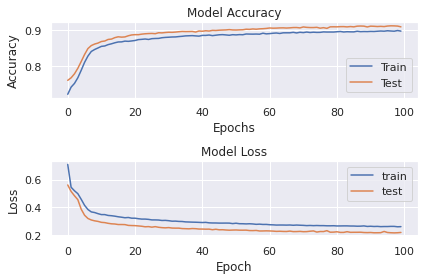

In [ ]:
#Plotting Neural Network Training and validation
%matplotlib inline
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

Accuracy Score:  91.03%
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     11742
           1       0.91      0.93      0.92     14234

    accuracy                           0.91     25976
   macro avg       0.91      0.91      0.91     25976
weighted avg       0.91      0.91      0.91     25976



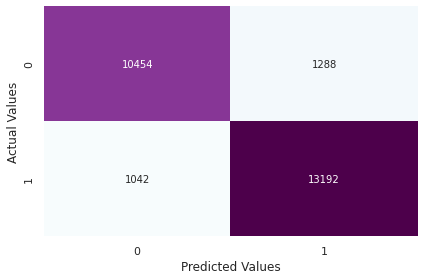

In [ ]:
y_pred=(model.predict(X_test) > 0.5).astype(int)   
print('Accuracy Score: ', '{:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#MICE Linear Regression with Power transformer

In [ ]:
df_fin = dict_list[3]['df_PowerTransformer']
X_train, X_test,y_train,y_test = train_test_split(df_fin, Y, test_size=0.2)

history3 = model.fit(X_train, y_train, batch_size = 32, epochs = 100, callbacks=[early_stopping], validation_split=0.2)

Epoch 1/100
2598/2598 [==============================] - 12s 5ms/step - loss: 0.5598 - accuracy: 0.7139 - val_loss: 0.4493 - val_accuracy: 0.8233
Epoch 2/100
2598/2598 [==============================] - 9s 3ms/step - loss: 0.4695 - accuracy: 0.7589 - val_loss: 0.3761 - val_accuracy: 0.8398
Epoch 3/100
2598/2598 [==============================] - 8s 3ms/step - loss: 0.4282 - accuracy: 0.7862 - val_loss: 0.3460 - val_accuracy: 0.8482
Epoch 4/100
2598/2598 [==============================] - 8s 3ms/step - loss: 0.4032 - accuracy: 0.8063 - val_loss: 0.3237 - val_accuracy: 0.8568
Epoch 5/100
2598/2598 [==============================] - 9s 3ms/step - loss: 0.3816 - accuracy: 0.8275 - val_loss: 0.3145 - val_accuracy: 0.8567
Epoch 6/100
2598/2598 [==============================] - 8s 3ms/step - loss: 0.3715 - accuracy: 0.8323 - val_loss: 0.3047 - val_accuracy: 0.8627
Epoch 7/100
2598/2598 [==============================] - 8s 3ms/step - loss: 0.3636 - accuracy: 0.8409 - val_loss: 0.2958 - val_a

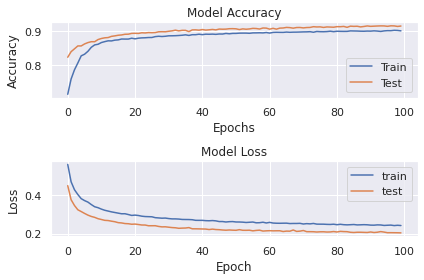

In [ ]:
#Plotting Neural Network Training and validation
%matplotlib inline
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

Accuracy Score:  91.45%
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     11723
           1       0.92      0.92      0.92     14253

    accuracy                           0.91     25976
   macro avg       0.91      0.91      0.91     25976
weighted avg       0.91      0.91      0.91     25976



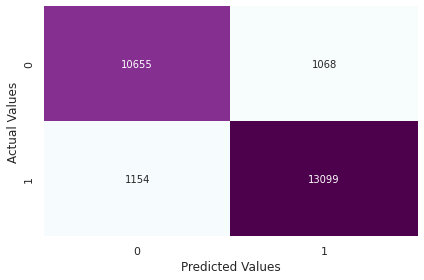

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred=(model.predict(X_test) > 0.5).astype(int)   
print('Accuracy Score: ', '{:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#Comparing accuracy of mode, median, mean imputation techniques

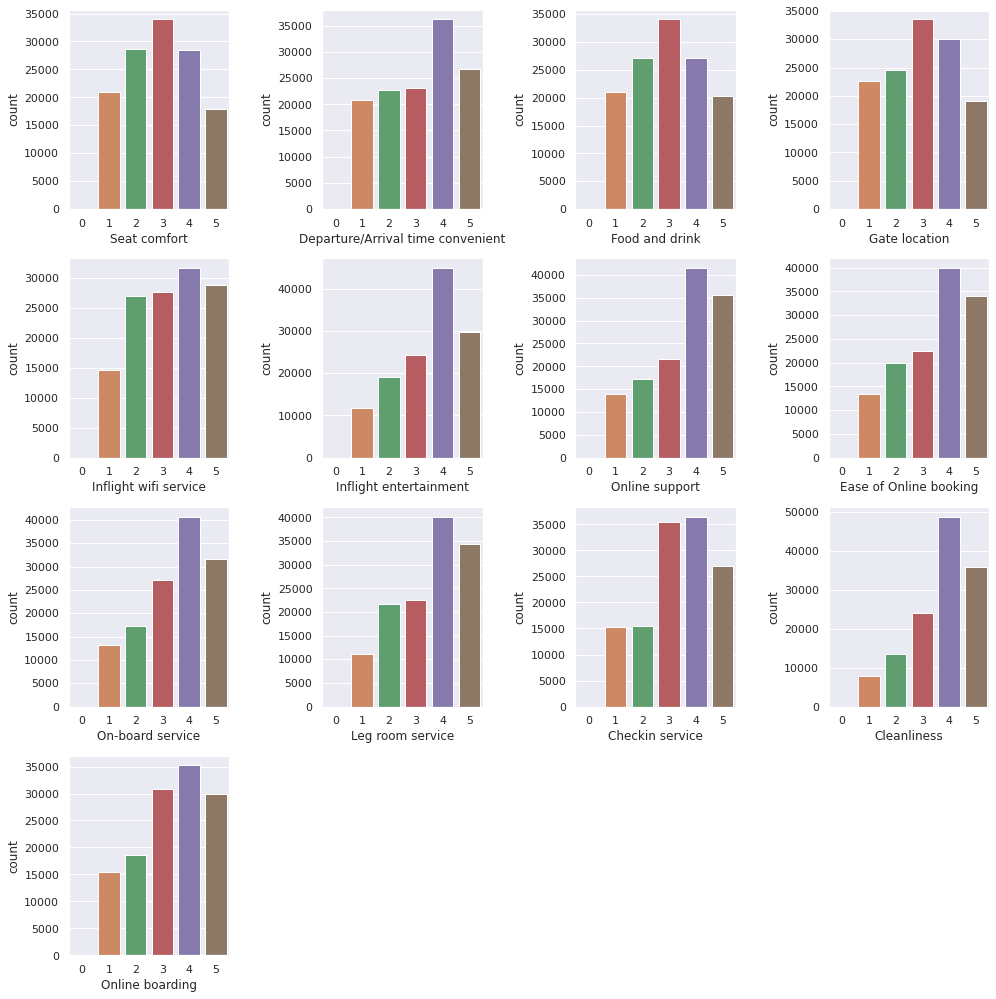

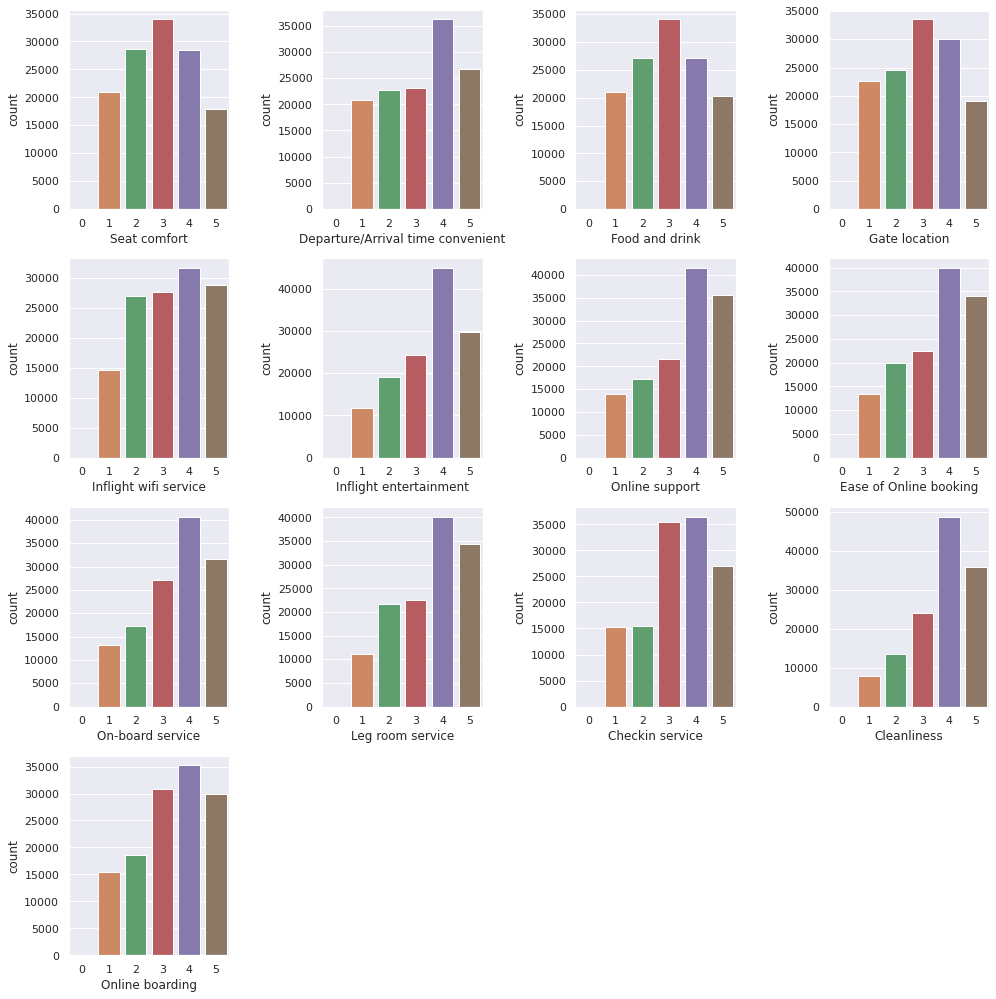

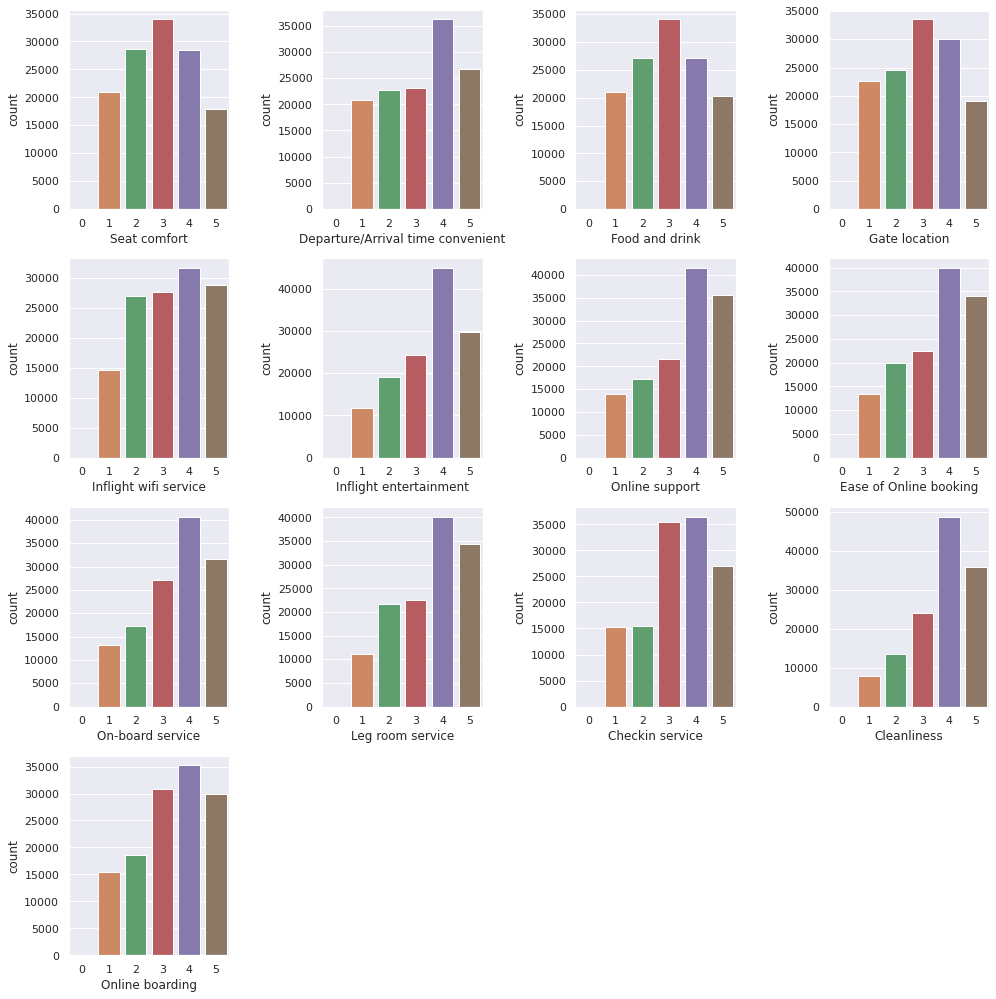

0.9332845703726517
0.9334000615953187
0.9356328919002156


In [ ]:
d1 = mode_impute(X)
d2 = mean_impute(X)
d3 = median_impute(X)

from sklearn import tree

# Building Decision Tree model 
dtc_model = tree.DecisionTreeClassifier(random_state=0)
X_train, X_test,y_train,y_test = train_test_split(d1, Y, test_size=0.2)
dtc_model.fit(X_train, y_train)

dtc_prediction = dtc_model.predict(X_test)
print(accuracy_score(dtc_prediction, y_test))

X_train, X_test,y_train,y_test = train_test_split(d2, Y, test_size=0.2)
dtc_model.fit(X_train, y_train)

dtc_prediction = dtc_model.predict(X_test)
print(accuracy_score(dtc_prediction, y_test))

X_train, X_test,y_train,y_test = train_test_split(d3, Y, test_size=0.2)
dtc_model.fit(X_train, y_train)

dtc_prediction = dtc_model.predict(X_test)
print(accuracy_score(dtc_prediction, y_test))

# KNN_model = KNeighborsClassifier(n_neighbors=5)
# KNN_model.fit(X_train, y_train)
# KNN_prediction = KNN_model.predict(X_test)
# print(accuracy_score(KNN_prediction, y_test))
# print(classification_report(KNN_prediction, y_test))
